# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
1,520,89,40,89,174,58,8,177,37,21,133,202,471,155,70,7,18,189,196
2,32,93,35,66,154,59,6,142,46,18,128,162,304,120,64,5,13,197,202
3,785,85,43,66,123,56,6,148,46,19,145,166,319,171,85,6,11,179,182
4,566,108,54,103,212,65,11,208,32,24,162,228,648,240,71,9,0,189,197
5,46,91,43,70,133,55,8,130,51,18,146,159,253,156,70,1,8,190,194
6,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
7,391,91,38,70,160,66,25,140,47,18,139,162,296,130,67,4,11,192,202
8,368,84,45,68,148,64,6,146,46,19,142,168,317,180,75,5,1,183,187
9,527,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,411.546448,93.752277,45.012750,82.061931,168.754098,61.442623,8.515483,169.699454,40.763206,20.652095,148.255009,189.519126,444.903461,175.591985,72.657559,6.353370,12.597450,188.799636,195.411658
std,237.635348,8.508938,6.260015,16.186521,34.182470,8.415254,4.679338,33.800764,7.950028,2.637652,14.738245,31.942954,179.461522,32.728830,7.698898,4.910782,9.030164,6.139789,7.533498
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,87.000000,40.000000,69.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,151.000000,67.000000,2.000000,5.000000,184.000000,189.000000
50%,408.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,158.000000,43.000000,20.000000,146.000000,180.000000,367.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,606.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,604.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.unique(y_train)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [6]:
for el in enumerate(np.unique(y_train)):
    y_train[y_train == el[1]] = el[0]
    y_test[y_test == el[1]] = el[0]
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [7]:
for i in range(4):
    print('{} class has {} samples\n'.format(i, y_train[y_train==i].size))

0 class has 148 samples

1 class has 141 samples

2 class has 148 samples

3 class has 112 samples



**_I scaled all the features in the dataset as they had significant differences in values. Also I replaced the names of target values with digits to have a possibility to work with them. Finally, I checked the balance of classes and it turned out to be OK._**

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial', random_state=42)
params = {'penalty':['l1','l2'], 'C':[0.1, 0.1, 1, 10]}
cv = GridSearchCV(lr, params)
cv.fit(X_train, y_train)
print('CV score results:')
print('\n'.join(map(str, list(zip(cv.cv_results_['params'], cv.cv_results_['mean_test_score'])))))
print()
print('BEST C = {}, BEST penalty "{}"'.format(cv.best_params_['C'], cv.best_params_['penalty']))

CV score results:
({'C': 0.1, 'penalty': 'l1'}, 0.6702418682235196)
({'C': 0.1, 'penalty': 'l2'}, 0.7194328607172644)
({'C': 0.1, 'penalty': 'l1'}, 0.6702418682235196)
({'C': 0.1, 'penalty': 'l2'}, 0.7194328607172644)
({'C': 1, 'penalty': 'l1'}, 0.7649374478732278)
({'C': 1, 'penalty': 'l2'}, 0.7576647206005005)
({'C': 10, 'penalty': 'l1'}, 0.7813177648040034)
({'C': 10, 'penalty': 'l2'}, 0.7813177648040034)

BEST C = 10, BEST penalty "l1"


In [9]:
best_lr = LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial', 
                             C=cv.best_params_['C'], penalty=cv.best_params_['penalty'], random_state=42)
best_lr.fit(X_train, y_train)
y_pred_proba = best_lr.predict_proba(X_test)
y_pred = best_lr.predict(X_test)
print('Accuracy = ', best_lr.score(X_test, y_test))
print('F1 score = ', f1_score(y_test, y_pred, average='macro'))

Accuracy =  0.8181818181818182
F1 score =  0.8083714290563002


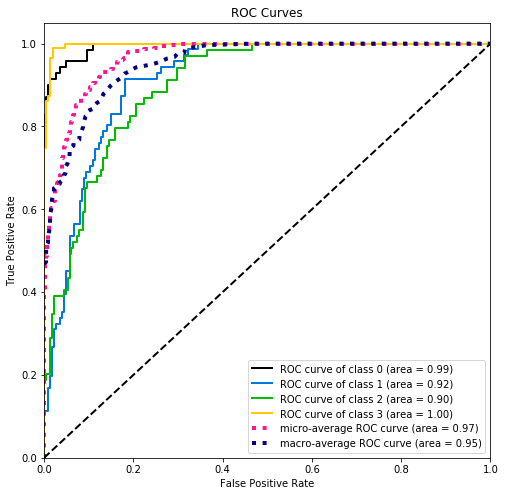

In [10]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, y_pred_proba, figsize=(8,8))

**_I've chosen the best penalty and regularisation coefficient for linear regression according to CV. And then applied this model to data. In the picture of ROC curve I can see that the model perfectly predict samples from 0 and 3 classes._**

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

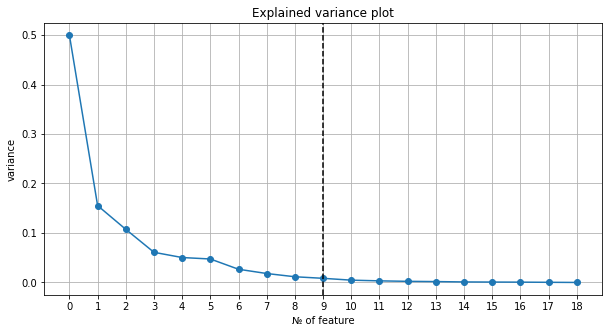

In [11]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

plt.figure(figsize=(10,5))
plt.grid()
plt.xticks(ticks=np.arange(19))
plt.plot(np.arange(19), pca.explained_variance_ratio_, '-o')
plt.axvline(9, linestyle='--', color='black')
plt.title('Explained variance plot')
plt.ylabel('variance')
plt.xlabel('№ of feature')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [12]:
### YOUR CODE HERE
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Current space explains {}% of variance'.format(pca.explained_variance_ratio_.sum().round(3)))

Current space explains 0.985% of variance


**_The plot from section 2.2 shows that the variance of X_train matrix is almost fully explained by first 10 features. That's why I choose n_components = 10. The data should be normalized for selection of the appropriate approximating space._**

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

BEST С = 10, BEST penalty "l1"

Accuracy =  0.734006734006734
F1 score =  0.7203245494659574


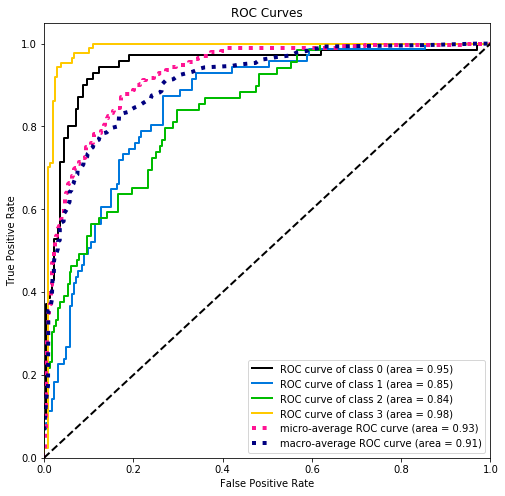

In [13]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline
n_components = 10
pipe = Pipeline(steps=[('prepr', PCA(n_components=n_components, random_state=42)), 
                       ('est', LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial', 
                                                  random_state=42))])
params_p = {'est__penalty': ['l1', 'l2'], 'est__C': [0.01, 0.1, 1, 10, 100]}

cv_p = GridSearchCV(pipe, params_p)
cv_p.fit(X_train, y_train)
pipe.set_params(est__C = cv_p.best_params_['est__C'], est__penalty = cv_p.best_params_['est__penalty'])
print('BEST С = {}, BEST penalty "{}"'.format(cv_p.best_params_['est__C'], cv_p.best_params_['est__penalty']))
print()

pipe.fit(X_train, y_train)
y_pred_pca = pipe.predict(X_test)
y_pred_proba_pca = pipe.predict_proba(X_test)
print('Accuracy = ', pipe.score(X_test, y_test))
print('F1 score = ', f1_score(y_test, y_pred_pca, average='macro'))

plot_roc(y_test, y_pred_proba_pca, figsize=(8,8))

**_We lost a half part of the data and accuracy became 8% worse. However, ROC-AUC lost only 4%. It seems to be a good result._**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [14]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
treeCV = GridSearchCV(dec_tree, {'max_depth':np.arange(1,20,1)})
treeCV.fit(X_train, y_train)
print('BEST max depth is ', treeCV.best_params_['max_depth'])

best_tree = treeCV.best_estimator_
print('Accuracy = ', best_tree.score(X_test, y_test))
print('F1 score = ', f1_score(y_test, best_tree.predict(X_test), average='macro'))

BEST max depth is  8
Accuracy =  0.7239057239057239
F1 score =  0.7167994262949535


**_The model works worse than Logistic Regression_**

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [15]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

tree_accuracy = []
logreg_accuracy = []
tree_f1 = []
logreg_f1 = []
for i in range(2,100,5):
    bagg_tree = BaggingClassifier(best_tree, n_estimators=i, n_jobs=-1, random_state=42)
    bagg_logreg = BaggingClassifier(best_lr, n_estimators=i, n_jobs=-1, random_state=42)
    bagg_tree.fit(X_train, y_train)
    bagg_logreg.fit(X_train, y_train)
    tree_accuracy.append(bagg_tree.score(X_test, y_test))
    logreg_accuracy.append(bagg_logreg.score(X_test, y_test))
    tree_f1.append(f1_score(y_test, bagg_tree.predict(X_test), average='macro'))
    logreg_f1.append(f1_score(y_test, bagg_logreg.predict(X_test), average='macro'))

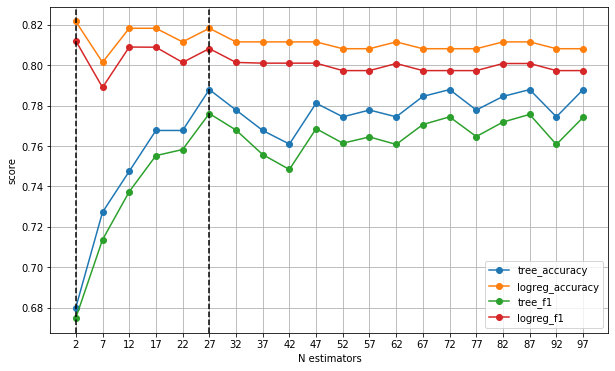

In [16]:
plt.figure(figsize=(10,6))

x = np.arange(2,100,5)
plt.plot(x, tree_accuracy, 'o-')
plt.plot(x, logreg_accuracy, 'o-')
plt.plot(x, tree_f1, 'o-')
plt.plot(x, logreg_f1, 'o-')
plt.axvline(x[np.argmax(tree_accuracy)], linestyle='--', color='black')
plt.axvline(x[np.argmax(logreg_accuracy)], linestyle='--', color='black')

labels = ['tree_accuracy', 'logreg_accuracy', 'tree_f1', 'logreg_f1']
plt.xticks(x)
plt.grid()
plt.legend(labels)
plt.ylabel('score')
plt.xlabel('N estimators')
plt.show()

**_According to the plot the optimal number of algorithms in ensemble is ~30 for decision tree (metrics starts to stabilize at this point) and ~15 for logistic regression. Moreover, the more models of logreg the ensemble has, the worse becomes metrics. It means that logistic regression doesn't need to have ensembles as it is a linear model. The ensemble of linear models is still a linear model and it has no new information in it. In my opinion, slight increase of max_depth for decision trees won't change the final score because averaging of answers will help to avoid overfitting._**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

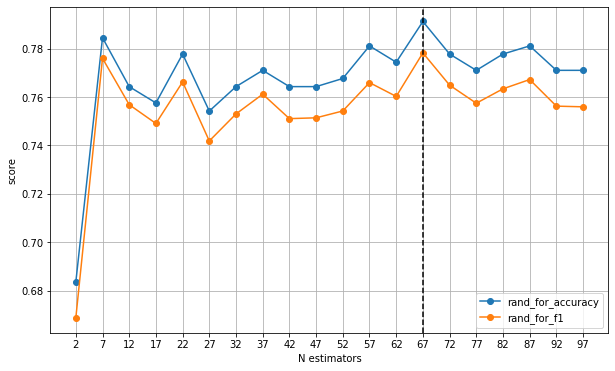

In [17]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rand_for_accuracy = []
rand_for_f1 = []
for i in range(2,100,5):
    rand_for = RandomForestClassifier(n_estimators=i, random_state=42)
    rand_for.fit(X_train, y_train)
    rand_for_accuracy.append(rand_for.score(X_test, y_test))
    rand_for_f1.append(f1_score(y_test, rand_for.predict(X_test), average='macro'))

plt.figure(figsize=(10,6))

x = np.arange(2,100,5)
plt.plot(x, rand_for_accuracy, 'o-')
plt.plot(x, rand_for_f1, 'o-')
plt.axvline(x[np.argmax(rand_for_accuracy)], linestyle='--', color='black')

labels = ['rand_for_accuracy', 'rand_for_f1']
plt.xticks(x)
plt.grid()
plt.legend(labels)
plt.ylabel('score')
plt.xlabel('N estimators')
plt.show()

**_In average, random forest plot stabilizes faster than bagging ensemble of decision trees plot. It means that we need to use less estimators to achieve similar results._**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [18]:
# YOUR CODE HERE
#splitting...
n_per_split = int(X_train.shape[0]/10) + 1
y_train_reshaped = y_train.reshape((-1,1))
X_train_splitted = np.zeros((10, n_per_split, X_train.shape[1]))
y_train_splitted = np.zeros((10, n_per_split, 1))
start = 0
stop = start + n_per_split
for i in range(9):
    X_train_splitted[i] = X_train[start:start + n_per_split]
    y_train_splitted[i] = y_train_reshaped[start:start + n_per_split]
    start = stop
    stop = (i + 1) * (n_per_split - 1)
X_train_splitted[9] = np.vstack((X_train[9 * (n_per_split):], np.zeros((1,19))))
y_train_splitted[9] = np.vstack((y_train_reshaped[9 * (n_per_split):], np.zeros((1,1))))

In [21]:
import warnings
warnings.filterwarnings("ignore")
acc_logreg_split = []
acc_d3_split = []
acc_rand_for_split = []
f1_logreg_split = []
f1_d3_split = []
f1_rand_for_split = []
best_rand_for = RandomForestClassifier(n_estimators=37, random_state=42)

X_cumsum = X_train_splitted[0]
y_cumsum = y_train_splitted[0]
best_lr.fit(X_cumsum, y_cumsum.reshape((-1)))
best_tree.fit(X_cumsum, y_cumsum.reshape((-1)))
best_rand_for.fit(X_cumsum, y_cumsum.reshape((-1)))
    
acc_logreg_split.append(best_lr.score(X_test, y_test))
acc_d3_split.append(best_tree.score(X_test, y_test))    
acc_rand_for_split.append(best_rand_for.score(X_test, y_test))
   
f1_logreg_split.append(f1_score(y_test, best_lr.predict(X_test), average='macro'))
f1_d3_split.append(f1_score(y_test, best_tree.predict(X_test), average='macro'))
f1_rand_for_split.append(f1_score(y_test, best_rand_for.predict(X_test), average='macro'))
 
for i in range(1, 10):
    X_cumsum = np.vstack((X_cumsum, X_train_splitted[i]))
    y_cumsum = np.vstack((y_cumsum, y_train_splitted[i]))
    
    best_lr.fit(X_cumsum, y_cumsum.reshape((-1)))
    best_tree.fit(X_cumsum, y_cumsum.reshape((-1)))
    best_rand_for.fit(X_cumsum, y_cumsum.reshape((-1)))
    
    acc_logreg_split.append(best_lr.score(X_test, y_test))
    acc_d3_split.append(best_tree.score(X_test, y_test))    
    acc_rand_for_split.append(best_rand_for.score(X_test, y_test))
    
    f1_logreg_split.append(f1_score(y_test, best_lr.predict(X_test), average='macro'))
    f1_d3_split.append(f1_score(y_test, best_tree.predict(X_test), average='macro'))
    f1_rand_for_split.append(f1_score(y_test, best_rand_for.predict(X_test), average='macro'))
     

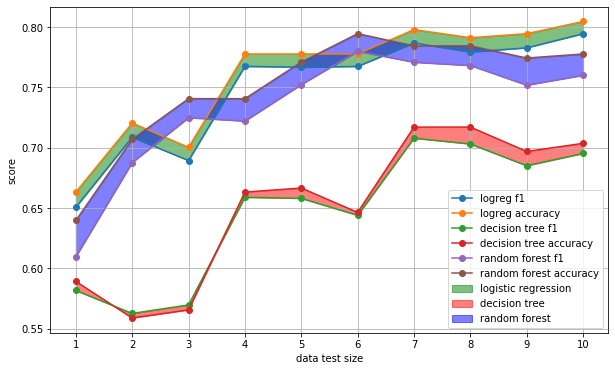

In [26]:
plt.figure(figsize=(10,6))

plt.plot(range(1,11), f1_logreg_split, 'o-')
plt.plot(range(1,11), acc_logreg_split, 'o-')
plt.fill_between(range(1,11), f1_logreg_split, acc_logreg_split, alpha=0.5, color='g')
plt.plot(range(1,11), f1_d3_split, 'o-')
plt.plot(range(1,11), acc_d3_split, 'o-')
plt.fill_between(range(1,11), f1_d3_split, acc_d3_split, alpha=0.5, color='r')
plt.plot(range(1,11), f1_rand_for_split, 'o-')
plt.plot(range(1,11), acc_rand_for_split, 'o-')
plt.fill_between(range(1,11), f1_rand_for_split, acc_rand_for_split, alpha=0.5, color='b')

labels = ['logreg f1', 'logreg accuracy', 'decision tree f1', 'decision tree accuracy', 
          'random forest f1', 'random forest accuracy', 'logistic regression', 'decision tree', 'random forest']
plt.legend(labels)
plt.xticks(range(1,11))
plt.ylabel('score')
plt.xlabel('data test size')
plt.grid()

**_The plot shows that the more training data we have, the better results models can predict._**